MNIST database is used for a dataset of images of handwritten numbers.

In [1]:
from keras.datasets import mnist


(X_train, y_train), (X_test, y_test) = mnist.load_data()

Using TensorFlow backend.


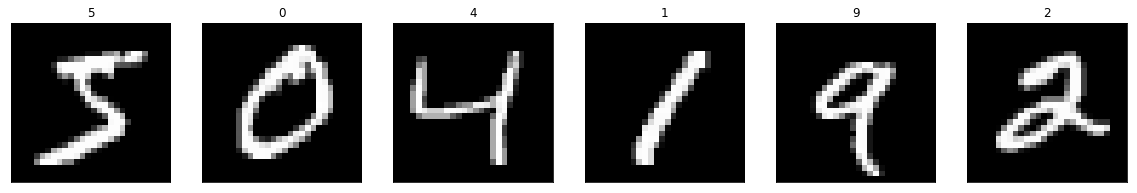

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np

# Plot first 6 training digits
fig =  plt.figure(figsize=(20,20))
for i in range(6):
    ax = fig.add_subplot(1,6,i+1,xticks=[], yticks=[])
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(str(y_train[i]))

In [3]:
# Rescale [0, 255] -> [0, 1]
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [4]:
# Preprocessing the labels to one-hot encoding.
from keras.utils import np_utils

# Print first 10 training labels
print("Integer valued labels : ")
print(y_train[:10])

# one-hot encoding
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

# print first 10 one-hot encoded labels
print("One - hot labels : ")
print(y_train[:10])

Integer valued labels : 
[5 0 4 1 9 2 1 3 1 4]
One - hot labels : 
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


To use MLPs we need to convert the images that are encoded as matrices to vectors.

In [5]:
# Input layer will have 784 nodes (28*28)
# We use softmax activation for the output layer. So that we will get the probability for each digit being depicted in the image.

from keras.models import Sequential
from keras.layers import Dense, Flatten

# Defining the model
model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(512))
model.add(Dense(512))
model.add(Dense(10, activation = 'softmax'))

# Summarize the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [7]:
 # Adding dropout layers in hidden layers.

from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout

model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(512, activation='relu'))
# We start with small dropout probability at first. If necessary we will increase it later.
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax'))

# Summarize the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [8]:
# We now need a loss-function. 
# Since we are using multiple class classifier. 
# We will be using categorical-cross-entropy.
# Output will be in the form of a vector of 10 elements (probability values).
# If there is a high deviation for the output from the original value then the loss function will return a higher value.
# Optimizers are the functions that race towards the minimum of the loss function.
# rmsprop is an optimizer.


# Compile the model.
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics = ['accuracy'])

# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy= 100 * score[1]

# print test accuracy
print('Test accuracy : %.4f%%' %accuracy)

Test accuracy : 8.4500%


In [9]:
# Train the model
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='mnist.model.best.hdf5', verbose=1, save_best_only=True)
hist = model.fit(X_train, y_train, batch_size = 128, epochs = 10,
                validation_split=0.2, callbacks=[checkpointer],
                verbose=1, shuffle=True)
# 20 percent of data that was originally assigned as training data is split and used as validation set.
# checkpoint enables us to save the calculated weights for the model after each epochs.
# We set save_best_only as True in order to save only the weights that will give us best accuracies.
# When verbose is set to 1 it will let us know when the weights file is updated.


Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 5s 113us/step - loss: 0.2771 - acc: 0.9142 - val_loss: 0.1161 - val_acc: 0.9659

Epoch 00001: val_loss improved from inf to 0.11614, saving model to mnist.model.best.hdf5
Epoch 2/10
48000/48000 [==============================] - 5s 98us/step - loss: 0.1115 - acc: 0.9653 - val_loss: 0.1059 - val_acc: 0.9692

Epoch 00002: val_loss improved from 0.11614 to 0.10590, saving model to mnist.model.best.hdf5
Epoch 3/10
48000/48000 [==============================] - 6s 120us/step - loss: 0.0798 - acc: 0.9764 - val_loss: 0.0907 - val_acc: 0.9737

Epoch 00003: val_loss improved from 0.10590 to 0.09074, saving model to mnist.model.best.hdf5
Epoch 4/10
48000/48000 [==============================] - 6s 120us/step - loss: 0.0623 - acc: 0.9813 - val_loss: 0.0952 - val_acc: 0.9764

Epoch 00004: val_loss did not improve from 0.09074
Epoch 5/10
48000/48000 [==============================] - 5s 113us

In [10]:
# Load the weights that gave best accuracy.
model.load_weights('mnist.model.best.hdf5')

In [12]:
# Evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# Print accuracy
print('Test accuracy = %.4f%%' % accuracy)

Test accuracy = 98.0900%
